# API VK

__API (Application Programming Interface__ — это уже готовый код, который можно всунуть в свой код! Многие сервисы, в том числе Google и Вконтакте, предоставляют свои уже готовые решения для вашей разработки.

Примеры: 

* [Контактовский API](https://vk.com/dev/methods)
* [API twitter](https://developer.twitter.com/en/docs.html) - nope
* [API youtube](https://developers.google.com/youtube/v3/) 
* [API google maps](https://developers.google.com/maps/documentation/) 
* [Aviasales](https://www.aviasales.ru/API)
* [Yandex Translate](https://yandex.ru/dev/translate/)

Оно есть почти везде! На этом семинаре мы посмотрим API контакта.

## 3.1 API vk

Зачем может понадобиться доступ к API контакта, думаю, объяснять не надо. Социальная сетка — это тонны различной полезной информации, которую можно заиспользовать для своих целей. [В документации](https://vk.com/dev/manuals) очень подробно описано как можно работать с API контакта и к чему это приводит. 

Но для начала к API нужно получить доступ. Для этого придётся пройти пару бюрократических процедур (о, боже, эти два предложения были так бюрократически сформулированы, что мне захотелось отстоять в очереди).

Первая такая процедура заключается в создании своего приложения. Для этого переходим по [ссылке](http://vk.com/editapp?act=create) и проходимся по необходимым шагам:

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_1.png" width="500">

После подтверждения своей личности по номеру телефона, попадаем на страницу свежесозданного приложения

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_2.png" width="500">

Слева нам будем доступна вкладка с настройками, перейдя в неё мы увидим все необходимые нам для работы с приложением параметры:
<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_3.png" width="500">

Отсюда в качестве токена можно забрать сервисный ключ доступа. Для работы с частью методов API этого вполне достаточно (обычно в заголовке такого метода стоит соответствующая пометка). Иногда нужны дополнительные доступы. Для того, чтобы получить их, необходимо сделать ещё пару странных манипуляций:

Переходим по ссылке вида (на месте звездочек должен стоять ID созданного вами приложения):

> https://oauth.vk.com/authorize?client_id=**********&scope=8198&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token

В итоге по этому запросу будет сформирована ссылка следующего вида:
> https://oauth.vk.com/blank.html#access_token=25b636116ef40e0718fe4d9f382544fc28&expires_in=86400&user_id=*******

Первый набор знаков — `access token`, т.е. маркер доступа. Вторая цифра (`expires_in=`) время работы маркера доступа в секундах (одни сутки). По истечению суток нужно будет получить новый маркер доступа. Последняя цифра (`user_id=`) ваш ID Вконтакте. Нам в дальнейшем понадобится маркер доступа. Для удобства сохраним его в отдельном файле или экспортируем в глобальную область видимости. В целях безопасности ваших данных не стоит нигде светить токенами и тем более выкладывать их в открытый доступ. __Так можно и аккаунта случайно лишиться.__ Берегите токен смолоду. 

Обратите внимание на ссылку, по которой мы делали запрос на предоставление токена. Внутри неё находится странный параметр `scope=8198.` Это мы просим доступ к конкретным разделам. Подробнее познакомиться с взаимно-однозначным соответствием между числами и правами можно [в документации.](https://vk.com/dev/permissions) Например, если мы хотим получить доступ к друзьям, фото и стенам, мы подставим в scope цифру 2+4++8192=8198.

In [1]:
import requests

In [ ]:
https://oauth.vk.com/blank.html#access_token=vk1.a.vBFF_Ep-KNmXXMg-nQVc-UntI_znWlX82W1tlDMcv13gKQWlsph0NpYmzL_tH6JTgz8CN04UHEdb--CAp33A28YwRdJMvnR-Wu_NkKql-NQY4YyDobY-yEY_3FM8habxylWItAtra2DGdeyBO4PbxZUFo-7RtvNsIDwinkhZ_wzHqABUrHKqCTuYa4uFDtT9&expires_in=86400&user_id=3082394

In [2]:
# мой номер странички
myid = '3082394'  # вставить номер странички

# версия используемого API
version = '5.131' 
token = 'vk1.a.vBFF_Ep-KNmXXMg-nQVc-UntI_znWlX82W1tlDMcv13gKQWlsph0NpYmzL_tH6JTgz8CN04UHEdb--CAp33A28YwRdJMvnR-Wu_NkKql-NQY4YyDobY-yEY_3FM8habxylWItAtra2DGdeyBO4PbxZUFo-7RtvNsIDwinkhZ_wzHqABUrHKqCTuYa4uFDtT9'


In [3]:
requests.get(f'https://api.vk.com/method/users.get?user_id=3082394&v={version}&access_token={token}').json()

{'response': [{'id': 3082394,
   'first_name': 'Максим',
   'last_name': 'Карпов',
   'can_access_closed': True,
   'is_closed': False}]}

Чтобы скачать что-то из контакта, надо сделать ссылку и сходить по ней пакетом `requests`. Ссылка должна будет включать в себя метод (что мы просим у вк) и параметры (насколько много и как именно). Мы будем просто заменять эти две штуки и выкачивать разные вещи. 

In [4]:
method = 'users.get'
parameters = 'user_ids=3082394'

url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url) 
response.json()

{'response': [{'id': 3082394,
   'first_name': 'Максим',
   'last_name': 'Карпов',
   'can_access_closed': True,
   'is_closed': False}]}

В ответ на наш запрос vk выкидывает JSON с информацией. JSON очень похож на питонячие словарики. Смысл квадратных и фигурных скобок такой же. Правда, есть и отличия: например, в Python одинарные и двойные кавычки ничем не отличаются, а в JSON можно использовать только двойные. 

Мы видим, что полученный нами JSON представляет собой словарь, значения которого — строки или числа, а также списки или словари, значения которых в свою очередь также могут быть строками, числами, списками, словарями и т.д. То есть получается такая довольно сложная структура данных, из которой можно вытащить всё то, что нас интересует. 

In [7]:
response.json()['response'][0]['first_name']

'Максим'

[В документации](https://vk.com/dev/manuals) очень подробно описано какие есть методы и какие у них бывают параметры.  Давайте завернём код выше в функцию и попробуем что-нибудь скачать.

In [9]:
def vk_download(method, parameters):
    
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa

In [ ]:
#https://vk.com/cshse?z=photo-69306530_457242325%2Fwall-69306530_6941

Например, все лайки с [хайер скул оф мемс.](https://vk.com/hsemem)
Как найти адрес страницы [тут](https://vk.com/faq18062)

In [8]:
group_id = '-69306530'

In [8]:
group_id = '-139105204'  # взяли из ссылки на группу

In [35]:
wall = vk_download('wall.get', 'owner_id={}&count=100'.format(group_id))
wall = wall['response']

In [41]:
len(wall['items'])

100

In [37]:
wall['items'][5]

{'id': 6928,
 'from_id': -69306530,
 'owner_id': -69306530,
 'date': 1655654160,
 'marked_as_ads': 0,
 'is_favorite': False,
 'post_type': 'post',
 'text': 'Пришло время выложить последнее видео, записанное во время нашей международной зимней школы по программной инженерии (International Winter School on Software Engineering) 🙂\n\n🗣Спикер: Алексей Лисица, lecturer in Computer Science, University of Liverpool\n💬Тема: Abstract State Machines: a modelling method for complex systems\n\nhttps://www.youtube.com/watch?v=2PqKBD0yUCc',
 'attachments': [{'type': 'video',
   'video': {'access_key': 'ecc31cf656c3e471a0',
    'can_comment': 1,
    'can_like': 1,
    'can_repost': 1,
    'can_subscribe': 1,
    'can_add_to_faves': 1,
    'can_add': 1,
    'comments': 0,
    'date': 1655650221,
    'description': 'Day 4 of the International Winter School on Software Engineering, 14-18 February 2022, Faculty of Computer Science, HSE University.\n\nSpeaker: Alexei Lisitsa, Lecturer in Computer Science,

In [14]:
post = vk_download('wall.getComments', 'owner_id={}&post_id=6928'.format(group_id))

In [15]:
post

{'response': {'count': 0,
  'items': [],
  'current_level_count': 0,
  'can_post': True,
  'show_reply_button': True,
  'groups_can_post': True}}

In [16]:
post['response']

{'count': 0,
 'items': [],
 'current_level_count': 0,
 'can_post': True,
 'show_reply_button': True,
 'groups_can_post': True}

In [17]:
post

{'response': {'count': 0,
  'items': [],
  'current_level_count': 0,
  'can_post': True,
  'show_reply_button': True,
  'groups_can_post': True}}

In [18]:
wall['items'][6]

{'id': 6926,
 'from_id': -69306530,
 'owner_id': -69306530,
 'date': 1655630100,
 'marked_as_ads': 0,
 'is_favorite': False,
 'post_type': 'post',
 'text': 'Сегодня вновь делимся с вами рубрикой «2 абзаца», где наши эксперты кратко и емко отвечают на казалось бы простые вопросы по своей теме. Наш сегодняшний герой — Петр Лукьянченко, старший преподаватель департамента больших данных и информационного поиска.\n\n❓Можно ли придумать алгоритм, который победит биржу? \n \n❗Во всех сферах своей деятельности люди стремятся придумать самое лучшее — самое быстрое, самое эффективное, самое надежное. Поэтому когда математики, data scientist’ы и программисты начинают работать на финансовых рынках или торговать на биржевых рынках, у них появляется желание создать самый эффективный алгоритм, который принесет наибольшую доходность — «победит» биржу. Кажется, что можно сравнивать, какой алгоритм позволил заработать больше по сравнению, например, с доходностью самих инструментов. Однако это неправильн

In [19]:
wall['items'][6]

{'id': 6926,
 'from_id': -69306530,
 'owner_id': -69306530,
 'date': 1655630100,
 'marked_as_ads': 0,
 'is_favorite': False,
 'post_type': 'post',
 'text': 'Сегодня вновь делимся с вами рубрикой «2 абзаца», где наши эксперты кратко и емко отвечают на казалось бы простые вопросы по своей теме. Наш сегодняшний герой — Петр Лукьянченко, старший преподаватель департамента больших данных и информационного поиска.\n\n❓Можно ли придумать алгоритм, который победит биржу? \n \n❗Во всех сферах своей деятельности люди стремятся придумать самое лучшее — самое быстрое, самое эффективное, самое надежное. Поэтому когда математики, data scientist’ы и программисты начинают работать на финансовых рынках или торговать на биржевых рынках, у них появляется желание создать самый эффективный алгоритм, который принесет наибольшую доходность — «победит» биржу. Кажется, что можно сравнивать, какой алгоритм позволил заработать больше по сравнению, например, с доходностью самих инструментов. Однако это неправильн

In [20]:
wall['items'][0].keys()

dict_keys(['id', 'from_id', 'owner_id', 'date', 'marked_as_ads', 'is_favorite', 'post_type', 'text', 'attachments', 'post_source', 'comments', 'likes', 'reposts', 'views', 'donut', 'short_text_rate', 'carousel_offset', 'hash'])

In [22]:
wall['items'][0]['from_id']

-69306530

In [23]:
wall['items'][0]['likes']['count']

5

In [24]:
likes = [item['likes']['count'] for item in wall['items']]
likes[:10]

[5, 2, 8, 18, 6, 7, 4, 8, 24, 12]

За один запрос скачалось всего-лишь $100$ постов с лайками. В паблике их целых

In [25]:
wall['count']

3293

[Документация](https://vk.com/dev/manuals) говорит, что есть параметр `offset`, с помощью которого можно указать какие именно посты из группы нужно скачать. Например, если мы укажем `offset = 100`, скачается вторая сотня. Наше дело за малым: написать цикл. 

In [26]:
likes = []

from tqdm import tqdm

In [27]:
import time

likes = [ ] # сюда буду сохранять лайки

for offset in tqdm(range(0, 4800, 100)):
    
    time.sleep(0.4) # вк согласен работать 3 раза в секунду, 
                    # между запросами python спит 0.4 секунды
    
    wall = vk_download('wall.get', 'owner_id={}&count=100&offset={}'.format(group_id, offset))
    
    likes.extend([item['likes']['count'] for item in wall['response']['items']])

100%|██████████| 48/48 [00:45<00:00,  1.05it/s]


Лайки в наших руках. Можем даже посмотреть на их распределение и попробовать что-то с ними сделать. 

In [28]:
len(likes)

3293

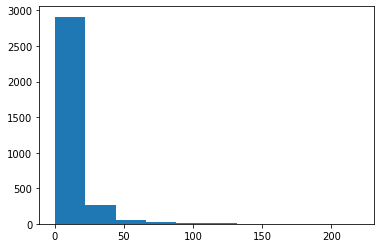

In [29]:
import matplotlib.pyplot as plt 

plt.hist(likes);

В принципе похожим образом можно скачать что угодно.

In [33]:
wall['items'][0]

KeyError: 'items'

In [44]:
wall['items'][0]['text']

'В июне делегация Клуба предпринимателей ФКН и МИЭМ НИУ ВШЭ приехала в столицу Казахстана Нур-Султан, чтобы представить студенческие стартапы ИТ-сообществу. Поездка была организована в рамках программы по развитию предпринимательства среди студентов и аспирантов факультета компьютерных наук Высшей школы экономики.\n\nИз более чем 40 студенческих IT-проектов коллеги из АО «Астана Innovations» выбрали и пригласили два стартапа на очные презентации в Нур-Султане. Этими двумя проектами стали GM (Богдан Чечин, 2 курс ПМИ) и AI Diagnostic (Василий Вьялков 3 курс ПМИ и Кирилл Лопатин 4 курс ПМ МИЭМ).\n\nВо время поездки делегация Вышки познакомилась с IT-сообществом Нур-Султана и обсудила внедрение студенческих стартапов в IT-решения города.\n\nПодробности по ссылке https://www.hse.ru/news/life/663104533.html'

In [71]:
wall['items'][0]['likes']['count']

5

In [76]:
text = []
for i in wall['items']:
    text.append(i['text'])

In [77]:
likes = []
for i in wall['items']:
    likes.append(i['likes']['count'])

In [78]:
len(text)

100

In [79]:
len(likes)

100

In [80]:
import pandas as pd

In [81]:
data = pd.DataFrame({'text' : text, 'likes' : likes})

In [54]:
data.columns = ['text']

In [82]:
data

,text,likes
0,В июне делегация Клуба предпринимателей ФКН и ...,5
1,"Всем, кто поступает в магистратуру! Сегодня ст...",3
2,"Денис Деркач, старший научный сотрудник лабора...",8
3,НИУ ВШЭ и 1С подписали соглашение о расширении...,18
4,Приемная кампания начинается уже сегодня 🥳\n\n...,6
...,...,...
95,И мы возвращаемся к вам с кроссвордами 🙂 \n \n...,5
96,Ботать высшую математику по учебникам может бы...,8
97,Факультет компьютерных наук ВШЭ приглашает все...,26
98,"Уже завтра состоится ИТ-лекторий на тему ""Обзо...",7


# Хитрости: 

### Хитрость 1:  Не стесняйтесь пользоваться `try-except`

Эта конструкция позволяет питону в случае ошибки сделать что-нибудь другое либо проигнорировать её. Например, мы хотим найти логарифм от всех чисел из списка: 

In [133]:
from math import log 

a = [1,2,3,-1,-5,10,3]

for item in a:
    print(log(item))

0.0
0.6931471805599453
1.0986122886681098


ValueError: math domain error

У нас не выходит, так как логарифм от отрицательных чисел не берётся. Чтобы код не падал при возникновении ошибки, мы можем его немного изменить: 

In [134]:
from math import log 

a = [1,2,3,-1,-5,10,3]

for item in a:
    try:
        print(log(item))  # попробуй взять логарифм
    except:
        print('я не смог') # если не вышло, сознайся и работай дальше

0.0
0.6931471805599453
1.0986122886681098
я не смог
я не смог
2.302585092994046
1.0986122886681098


__Как это использовать при парсинге?__  Интернет создаёт человек. У многих людей руки очень кривые. Предположим, что мы на ночь поставили парсер скачивать цены, он отработал час и упал из-за того, что на како-нибудь одной странице были криво проставлены теги, либо вылезло какое-то редкое поле, либо вылезли какие-то артефакты от старой версии сайта, которые не были учтены в нашем парсере. Гораздо лучше, чтобы код проигнорировал эту ошибку и продолжил работать дальше. 

### Хитрость 2:  pd.read_html

Если на странице, которую вы спарсили, среди тэгов `<tr>` и `<td>` прячется таблица, чаще всего можно забрать её себе без написания цикла, который будет перебирать все стобцы и строки. Поможет в этом `pd.read_html`. Например, вот так можно забрать себе [табличку с сайта ЦБ](https://cbr.ru/currency_base/daily/) 

In [136]:
import pandas as pd

df = pd.read_html('https://cbr.ru/currency_base/daily/')[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,437485
1,944,AZN,1,Азербайджанский манат,358568
2,51,AMD,100,Армянских драмов,140495
3,933,BYN,1,Белорусский рубль,234088
4,975,BGN,1,Болгарский лев,334283


Команда пытается собрать в массив все таблички c веб-страницы. Если хочется, можно сначала через bs4 найти нужную таблицу, а потом уже распарсить её: 

In [138]:
resp = requests.get('https://cbr.ru/currency_base/daily/')
tree = BeautifulSoup(resp.content, 'html.parser')

# нашли табличку
table = tree.find_all('table', {'class' : 'data'})[0]

# распарсили её
df = pd.read_html(str(table))[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,437485
1,944,AZN,1,Азербайджанский манат,358568
2,51,AMD,100,Армянских драмов,140495
3,933,BYN,1,Белорусский рубль,234088
4,975,BGN,1,Болгарский лев,334283


### Хитрость 3:  используйте пакет tqdm

> Код уже работает час. Я вообще без понятия когда он закончит работу. Было бы круто узнать, сколько ещё ждать... 

Если в вашей голове возникла такая мысль, пакет `tqdm` ваш лучший друг. Установите его: ```pip install tqdm```

In [139]:
from tqdm import tqdm_notebook

a = list(range(30))

# 30 раз будем спать по секунде
for i in tqdm_notebook(a):
    time.sleep(1)

C:\Users\meale\AppData\Local\Temp/ipykernel_41104/2779082389.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(a):


  0%|          | 0/30 [00:00<?, ?it/s]